In [1]:
import xarray as xr
import pendulum
import recorta_dado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nino34 = pd.read_csv('historico_nino34.csv')
clima = pd.read_csv('clima_ninos.csv', sep=';', index_col='mes')

In [3]:
clima_oiv2_dict = {'mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'nino34': [26.51,
  26.7,
  27.26,
  27.87,
  27.92,
  27.72,
  27.27,
  26.8,
  26.64,
  26.65,
  26.68,
  26.58]}
clima_oiv2 = pd.DataFrame.from_dict(clima_oiv2_dict).set_index('mes')

In [4]:
def le_grib_por_mes(anomes:str):
    
    #arquivos = f'arquivos_teste_noaa/*.{anomes}.avrg.grib.00Z.grb2' # arquivos de monthly_grib_01 com 00z no nome
    arquivos = f'arquivos_teste_noaa/*.{anomes}.avrg.grib.grb2' # arquivos de monthly_grib_01 com nenhum ciclo no nome
    
    dataset = xr.open_mfdataset(arquivos, concat_dim="valid_time", combine="nested",
                    data_vars='minimal', coords='minimal', compat='override',
                    backend_kwargs={
                        "filter_by_keys": {
                            "typeOfLevel": "surface",
                            "shortName": "t",
                        },
                     },
                    parallel=True)
    
    return dataset

In [5]:
latitude=(5, -5)
longitude=(-170, -120)

def recorte(dataset, mes_int):
    tsm_nino = recorta_dado.main(dataset.t,
                contorno_tipo='lat_lon',
                tipo='grib',
                latitude=[ latitude[0], latitude[1]], 
                longitude=[ longitude[0], longitude[1] ]
                )

    tsm_recortada = tsm_nino.mean(dim=["latitude", "longitude"])
    valores = tsm_recortada.compute()
    valoresc = valores - 273.15 # valores de kelvin para celsius
    valores_anom = valoresc - clima_oiv2.nino34[mes_int] #clima.nino34[mes_int]
    
    return valores_anom

In [6]:
dict_nino_to_plot = {}
outro_dict = {}
for i in range(0,40):
    dict_nino_to_plot[i] = nino34
    outro_dict[i] = []

In [ ]:
inicio = pendulum.datetime(2022,10,1)
fim = pendulum.datetime(2023, 6, 1)
periodo = pendulum.period(inicio, fim)
#dict_nino_to_plot = {}

####################
## INICIO DO PLOT ##
####################
# Change the style of plot
#plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Previsão de anomalia de temperatura na Região do Niño 3.4', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-3,3)

ax.set_ylabel('Anomalia de temperatura', fontsize=20)
ax.set_xlabel('Data de previsão', fontsize=20)


##################
# FOR NOS LEADS ##
###################
#lista = []
for dt in periodo.range('months'):
    data_string = dt.format('YYYYMM')
    dt_df_format = f"{dt.format('YYYY-MM')}-01"
    mes_int = int(dt.format('MM'))

    dataset = le_grib_por_mes(data_string)
    anomalia_nino34 = recorte(dataset, mes_int)
    #lista.append(anomalia_nino34)
    
    
    for i in range(0,40):
        '''
        if i in dict_nino_to_plot.keys():
            dict_nino_to_plot[i] = nino34
            df2 = pd.DataFrame([[dt_df_format, anomalia_nino34[i].values]],
                       columns=['time', 'anom'])
    
            nino34c = pd.concat([dict_nino_to_plot[i], df2])
            dict_nino_to_plot[i] = nino34c
            
        else:
            df2 = pd.DataFrame([[dt_df_format, anomalia_nino34[i].values]],
                       columns=['time', 'anom'])
    
            nino34c = pd.concat([dict_nino_to_plot[i], df2])
            dict_nino_to_plot[i] = nino34c
        '''
        outro_dict[i].append([dt_df_format, anomalia_nino34[i].values])
        

    
###################
# RETORNO DO PLOT #
###################
'''
indice_data = pd.to_datetime(nino34c.time, format='%Y.%m.%d')
for i in range(0,40):
    ax.plot(indice_data, dict_nino_to_plot[i].anom.values, 'g', label=f'membro {i}', linewidth=2)
plt.legend(loc='center', fontsize=20, ncols=4, bbox_to_anchor=(0.5, -0.15))
'''
#indice_data = pd.to_datetime(nino34c.time, format='%Y.%m.%d')
contador = 0
for i in range(39,0,-1):
    
    if contador in range(0,7):
        cor = 'b'
    elif contador in range(32,40):
        cor='r'
    else:
        cor='#bd8d09'
        
    df2 = pd.DataFrame(outro_dict[i],
                       columns=['time', 'anom'])
    
    nino34c = pd.concat([dict_nino_to_plot[i], df2])
    dict_nino_to_plot[i] = nino34c
    
    indice_data = pd.to_datetime(nino34c.time, format='%Y.%m.%d')
    ax.plot(indice_data, dict_nino_to_plot[i].anom.values, cor, label=f'membro {i}', linewidth=1)
    
    contador = contador + 1
    
plt.legend(loc='center', fontsize=20, ncols=4, bbox_to_anchor=(0.5, -0.4))

ValueError: x and y must have same first dimension, but have shapes (21,) and (1,)

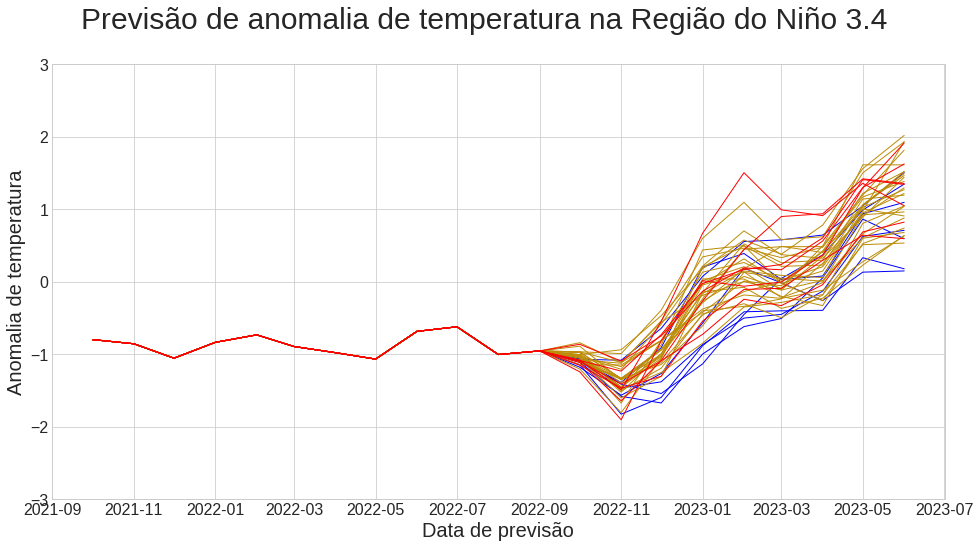

In [7]:
inicio = pendulum.datetime(2022,10,1)
fim = pendulum.datetime(2023, 6, 1)
periodo = pendulum.period(inicio, fim)

####################
## INICIO DO PLOT ##
####################
# Change the style of plot
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Previsão de anomalia de temperatura na Região do Niño 3.4', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-3,3)

ax.set_ylabel('Anomalia de temperatura', fontsize=20)
ax.set_xlabel('Data de previsão', fontsize=20)


##################
# FOR NOS LEADS ##
###################
for dt in periodo.range('months'):
    data_string = dt.format('YYYYMM')
    dt_df_format = f"{dt.format('YYYY-MM')}-01"
    mes_int = int(dt.format('MM'))

    dataset = le_grib_por_mes(data_string)
    anomalia_nino34 = recorte(dataset, mes_int)

    for i in range(0,40):

        outro_dict[i].append([dt_df_format, anomalia_nino34[i].values])
        

###################
# RETORNO DO PLOT #
###################
contador = 0
for i in range(39,0,-1):
    
    if contador in range(0,7):
        cor = 'b'
    elif contador in range(32,40):
        cor='r'
    else:
        cor='#bd8d09'
        
    df2 = pd.DataFrame(outro_dict[i],
                       columns=['time', 'anom'])
    
    nino34c = pd.concat([dict_nino_to_plot[i], df2])
    dict_nino_to_plot[i] = nino34c
    
    indice_data = pd.to_datetime(nino34c.time, format='%Y.%m.%d')
    ax.plot(indice_data, dict_nino_to_plot[i].anom.values, cor, label=f'membro {i}', linewidth=1)
    
    contador = contador + 1
    
ax.plot(indice_data, [0], cor, label=f'membro {i}', linewidth=1)
ax.plot(indice_data, nino34, "#000000", label=f'membro {i}', linewidth=1)
plt.legend(loc='center', fontsize=20, ncols=4, bbox_to_anchor=(0.5, -0.4))

In [ ]:
dict_nino_to_plot[i]

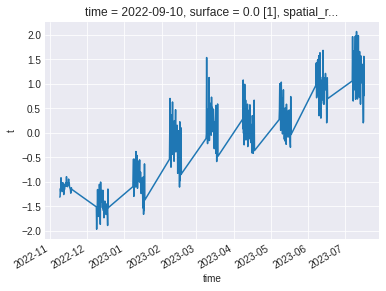

In [17]:
lista
xr.concat(lista, dim='valid_time').plot()

In [26]:
xr.concat(lista, dim='valid_time').to_netcdf('teste.nc')

# TESTE lendo todos os arquivos

In [14]:
arquivos = f'arquivos_teste_noaa/*.avrg.grib.grb2' # arquivos de monthly_grib_01 com nenhum ciclo no nome
    
dataset = xr.open_mfdataset(arquivos, concat_dim="valid_time", combine="nested",
                data_vars='minimal', coords='all', compat='override',
                backend_kwargs={
                    "filter_by_keys": {
                        "typeOfLevel": "surface",
                        "shortName": "t",
                    },
                 },
                parallel=True)

In [20]:
dataset.valid_time.values

array(['2022-10-10T00:00:00.000000000', '2022-11-09T00:00:00.000000000',
       '2022-12-09T00:00:00.000000000', '2023-01-08T00:00:00.000000000',
       '2023-02-07T00:00:00.000000000', '2023-03-09T00:00:00.000000000',
       '2023-04-08T00:00:00.000000000', '2023-05-08T00:00:00.000000000',
       '2023-06-07T00:00:00.000000000', '2023-07-07T00:00:00.000000000',
       '2022-10-10T06:00:00.000000000', '2022-11-09T06:00:00.000000000',
       '2022-12-09T06:00:00.000000000', '2023-01-08T06:00:00.000000000',
       '2023-02-07T06:00:00.000000000', '2023-03-09T06:00:00.000000000',
       '2023-04-08T06:00:00.000000000', '2023-05-08T06:00:00.000000000',
       '2023-06-07T06:00:00.000000000', '2023-07-07T06:00:00.000000000',
       '2022-10-10T12:00:00.000000000', '2022-11-09T12:00:00.000000000',
       '2022-12-09T12:00:00.000000000', '2023-01-08T12:00:00.000000000',
       '2023-02-07T12:00:00.000000000', '2023-03-09T12:00:00.000000000',
       '2023-04-08T12:00:00.000000000', '2023-05-08

In [22]:
#ds = dataset.groupby('time.year.month.day.hour').mean()

In [34]:
ds_ = dataset.groupby('valid_time.month').mean()

In [37]:
DS = dataset.groupby('valid_time.month').mean()

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, day: 10)
Coordinates:
  * latitude   (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * day        (day) int64 10 11 12 13 14 15 16 17 18 19
Data variables:
    t          (day, latitude, longitude) float32 dask.array<chunksize=(1, 181, 360), meta=np.ndarray>

In [29]:
dataset.groupby(['valid_time.year', 'valid_time.month', 'valid_time.day','valid_time.hour']).mean()

TypeError: `group` must be an xarray.DataArray or the name of an xarray variable or dimension. Received ['valid_time.year', 'valid_time.month', 'valid_time.day', 'valid_time.hour'] instead.